In [5]:
run all_utils.ipynb

In [6]:
## test on root -> 2 citations - > 4 citations (7 papers)
## this will be a dummy code 
## code block needed 
from networkx.readwrite import json_graph
import json
import networkx as nx
from matplotlib import pylab as pl
from itertools import combinations 
def get_data(paper_where):
        
    base_url = 'https://www.semanticscholar.org'
    filter_ = '?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations'
    print(base_url+paper_where+filter_)
    soup = get_shemantic_paper_html(paper_where)
    data = extract_data(soup)
    #print(data)
    corpus_id = ''.join(data['corpus_id'].split(' '))
    data_api = get_semantic_scholar_paper_by_api(corpus_id)
    
    abstract = data_api['abstract']
    topics = data['topics']
    title = data['title']
    citations =  [cit['link'] for cit in data['citations'][:2]] ## get 2 citation per paper
    #print(topics)
    return topics,title , abstract ,citations
    
    ## get data 
    
    #return  topics
def make_graph_from_abstarct(abstract):
    '''
    generate graph with weights and betweenss from abstarct text 
    args : abstract string 
    return : nx graph 
    '''
    text_network = create_graph(abstract)
    text_network = calculate_central_nodes(text_network,max_nodes = -1)
    return text_network

def procees_topics(topics_raw):
    '''
    procees topics stings to have same format as full graph nodes
    
    args : raw  topic list from api 
    return : cleaned list of topics 
    '''
    topics_words = ((' '.join(topics_raw)).translate(str.maketrans('', '', string.punctuation))).split(' ')
    top = preprocess(topics_words)
    return top
    
def filter_graph(full_graph,topics):
    '''
    process topics list then filter full graph giben topics nodes and merging edges 
    '''
    graph = nx.Graph()
    return filtred_graph




def get_topic_nodes_in_full_g(topics,graph):
    topics_f = procees_topics(topics)
    return list(set(topics_f).intersection(set(list(graph.nodes))))


def all_pairs_From(list_):
    return list(combinations(list_ , 2)) 
def get_Sp(pair,graph ,topics_f):
    is_edgeable = False
    ## get s path
    path = nx.shortest_path(graph,source=pair[0],target=pair[1], weight='distance')
    ## check if path nodes in topics_list
    non_terminal_nodes = path[1:-1]
    is_edgeable = (list(set(non_terminal_nodes).intersection(set(list(topics_f)))) == []) | (non_terminal_nodes==[])
    return path , is_edgeable
def compute_edge_from_path(path,graph):
    #print(path)
    pairs_ = list(zip(path, path[1:] + path[:1]))[:-1] ## delete last couple that link terminal nodes
    #print(pairs_)
    weights = [graph[pair_[0]][pair_[1]]['weight'] for pair_ in pairs_]
    #print(weights)
    edge_weight=0
    for w in weights : 
        edge_weight+=1/w
 
    return 1/edge_weight , (path[0],path[-1])
    

def topic_graph(abstract,topics,title):
    ## main 
    edge_list = []
    text_network = create_graph(abstract)
    topics = topics + title.split(' ')
    #print(topics)
    ## only on topic words that are in abtract (maybe we can have null edge nodes in future ...)
    topics_f = get_topic_nodes_in_full_g(topics,text_network)
    
    pairs = all_pairs_From(topics_f)
    
    for pair in pairs : 
        path , is_edgeable = get_Sp(pair,text_network,topics_f)
    
        if is_edgeable : 
    
            w,nodes = compute_edge_from_path(path,text_network)
            edge_list.append((nodes[0], nodes[1], {"weight": w}))
    
    G = nx.Graph(edge_list) 
    return G
        
def plot_graph(graph):
    pl.figure()
    nx.draw_networkx(graph)
    pl.show()


def export_graph(graph_dict):
    data = json_graph.node_link_data(graph_dict['graph'])
    path = './graph-ui/src/data/'+graph_dict['title']+'.json'
    with open(path, 'w') as outfile:
        json.dump(data, outfile)
    
def write_title(title):
    with open('./graph-ui/src/data/index.json') as json_file:
        data = json.load(json_file)
       ## print(data['graphs'])
        list_ = data['graphs']
    with open('./graph-ui/src/data/index.json','w') as json_file:
    
        list_ = list_+[title]    
        json.dump({'graphs':list_}, json_file) 
    return 'written'

depth =  0
https://www.semanticscholar.org/paper/Progressive-Growing-of-GANs-for-Improved-Quality%2C-Karras-Aila/744fe47157477235032f7bb3777800f9f2f45e52?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:3568073
topics :  ['Discriminator', 'Image quality', 'Unsupervised learning', 'Generative adversarial networks', 'Image resolution']
citations :  ['/paper/Improved-Consistency-Regularization-for-GANs-Zhao-Singh/b31fdc82691b36e22b2ba15846a7a757061da4fa', '/paper/MSG-GAN%3A-Multi-Scale-Gradients-for-Generative-Karnewar-Wang/10160745e7d9cebaa834a65f5dd5a428196e5217']


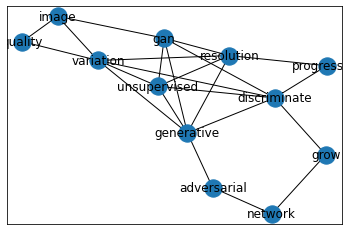

---------------------------------------
depth =  1
https://www.semanticscholar.org/paper/Improved-Consistency-Regularization-for-GANs-Zhao-Singh/b31fdc82691b36e22b2ba15846a7a757061da4fa?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:211082493
topics :  ['Improved', 'Consistency', 'Regularization', 'for', 'GANs']


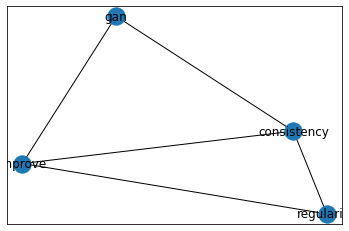

https://www.semanticscholar.org/paper/MSG-GAN%3A-Multi-Scale-Gradients-for-Generative-Karnewar-Wang/10160745e7d9cebaa834a65f5dd5a428196e5217?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:219687876
topics :  ['Discriminator', 'Concatenation', 'Generative adversarial networks', 'Image gradient', 'Feature vector', 'Local Interconnect Network', 'MSG-GAN:', 'Multi-Scale', 'Gradients', 'for', 'Generative', 'Adversarial', 'Networks']


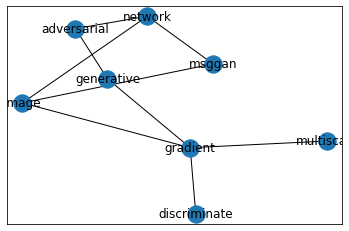

---------------------------------------
depth =  2
https://www.semanticscholar.org/paper/Top-k-Training-of-GANs%3A-Improving-GAN-Performance-Sinha-Zhao/9d5cc99d5d89355b209194bd2d7c4061570023eb?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:219708874
topics :  ['Top-k', 'Training', 'of', 'GANs:', 'Improving', 'GAN', 'Performance', 'by', 'Throwing', 'Away', 'Bad', 'Samples']


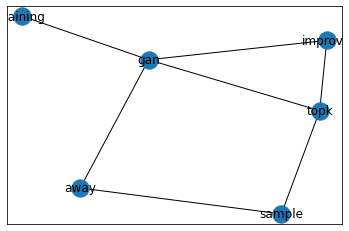

https://www.semanticscholar.org/paper/Freeze-Discriminator%3A-A-Simple-Baseline-for-GANs-Mo-Cho/0b10d741f6c2cf946604105bd85707af65c7ccf6?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:211296588
topics :  ['Discriminator', 'Overfitting', 'Generative adversarial networks', 'Baseline (configuration management)', 'Computer vision', 'Computational resource', 'Freeze', 'Discriminator:', 'A', 'Simple', 'Baseline', 'for', 'Fine-tuning', 'GANs']


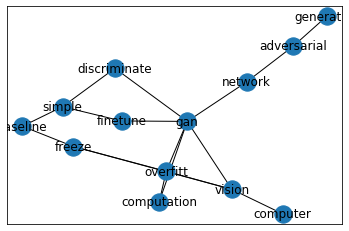

https://www.semanticscholar.org/paper/Generative-Adversarial-Networks-in-Computer-Vision%3A-Wang-She/2673354bc246e65962a6dca32d5f41cc8f11a249?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:213072261
topics :  ['Generative', 'Adversarial', 'Networks', 'in', 'Computer', 'Vision:', 'A', 'Survey', 'and', 'Taxonomy.']


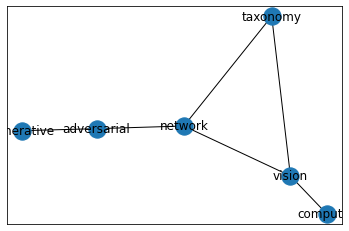

https://www.semanticscholar.org/paper/Enhanced-Evolutionary-Generative-Adversarial-Mu-Zhou/30c53ddcede0cfd1d0b480eea84b3d68472037fe?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:221590910
topics :  ['Enhanced', 'Evolutionary', 'Generative', 'Adversarial', 'Networks']


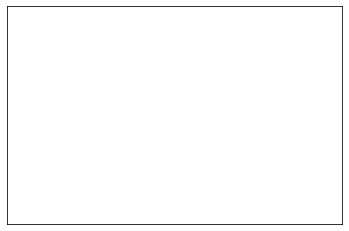

---------------------------------------
depth =  3
https://www.semanticscholar.org/paper/Sample-weighting-as-an-explanation-for-mode-in-Eide-Solberg/3e39e1c700fa39e177f21c7fec9ea901ea6ef31e?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:222133987
topics :  ['Sample', 'weighting', 'as', 'an', 'explanation', 'for', 'mode', 'collapse', 'in', 'generative', 'adversarial', 'networks']


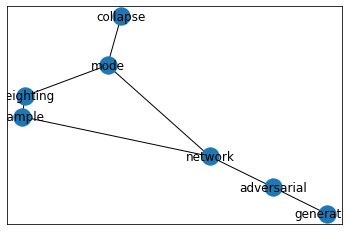

https://www.semanticscholar.org/paper/Temporal-Aware-Self-Supervised-Learning-for-3D-Hand-Chen-Lin/87d09a6b5938e0f82bb2eb77342db1f14e5c61c1?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:227335859
topics :  ['Temporal-Aware', 'Self-Supervised', 'Learning', 'for', '3D', 'Hand', 'Pose', 'and', 'Mesh', 'Estimation', 'in', 'Videos']


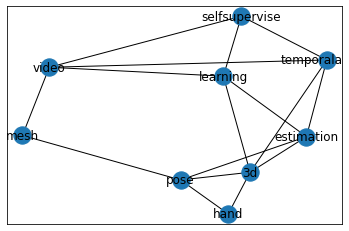

https://www.semanticscholar.org/paper/Training-Generative-Adversarial-Networks-with-Data-Karras-Aittala/f463a908d1dea4f6c219f31b3fef797f6a84f780?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:219636053
topics :  ['Training', 'Generative', 'Adversarial', 'Networks', 'with', 'Limited', 'Data']


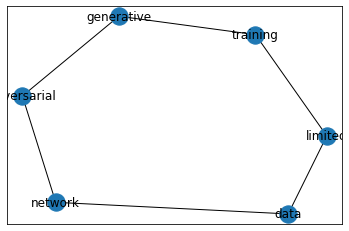

https://www.semanticscholar.org/paper/Few-Shot-Adaptation-of-Generative-Adversarial-Robb-Chu/4b8a11d7b2508d64a39e37968a3a00a2e80de187?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:225039998
topics :  ['Few-Shot', 'Adaptation', 'of', 'Generative', 'Adversarial', 'Networks']


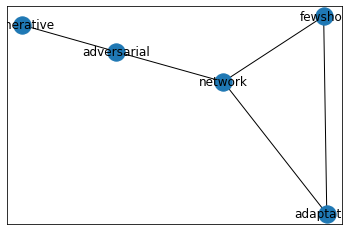

https://www.semanticscholar.org/paper/A-Review-on-Generative-Adversarial-Networks%3A-and-Gui-Sun/fbc5486a1ffb9039dbb5046b84f0eb32e4ce8eea?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:210839653
topics :  ['Generative adversarial networks', 'Natural language processing', 'Reinforcement learning', 'Computer vision', 'Semi-supervised learning', 'Image processing', 'Data science', 'Open research', 'Approximation algorithm', 'Machine learning', 'Supervised learning', 'Semiconductor industry', 'A', 'Review', 'on', 'Generative', 'Adversarial', 'Networks:', 'Algorithms,', 'Theory,', 'and', 'Applications']


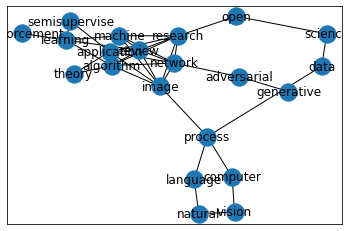

https://www.semanticscholar.org/paper/Video-Generative-Adversarial-Networks%3A-A-Review-Aldausari-Sowmya/5c1b1ab734ebc6ba56ea5d8af9d01a9fe8e0ba8b?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:226246346
topics :  ['Video', 'Generative', 'Adversarial', 'Networks:', 'A', 'Review']


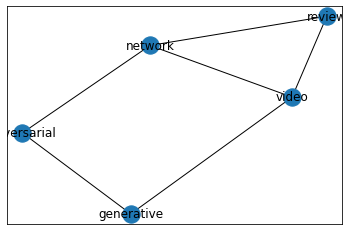

https://www.semanticscholar.org/paper/Evolutionary-Generative-Adversarial-Networks-Wang-Xu/cbca46c24c800bee41b21ac0258651db54892e80?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:3662488
topics :  ['Generative adversarial networks', 'Glossary of computer graphics', 'Instability', 'Iteration', 'Optimization problem', 'Programming paradigm', 'Experiment', 'Evolutionary', 'Generative', 'Adversarial', 'Networks']


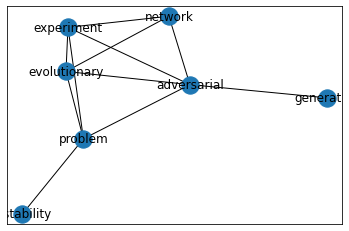

https://www.semanticscholar.org/paper/MSG-GAN%3A-Multi-Scale-Gradients-for-Generative-Karnewar-Wang/10160745e7d9cebaa834a65f5dd5a428196e5217?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:219687876
topics :  ['Discriminator', 'Concatenation', 'Generative adversarial networks', 'Image gradient', 'Feature vector', 'Local Interconnect Network', 'MSG-GAN:', 'Multi-Scale', 'Gradients', 'for', 'Generative', 'Adversarial', 'Networks']


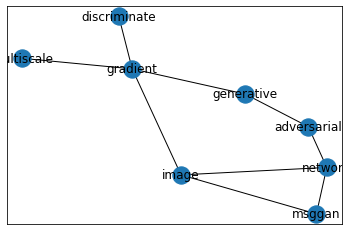

---------------------------------------


['written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written']

In [13]:
## test __main__
## root paper 

graphs_list = [ ]
n_iter = 3
print('depth = ' , 0 )
## root paper 
root_url = '/paper/Progressive-Growing-of-GANs-for-Improved-Quality%2C-Karras-Aila/744fe47157477235032f7bb3777800f9f2f45e52'
topics ,title, abstract,citations= get_data(root_url)
print('topics : ',topics)
print('citations : ', citations)
graph = topic_graph(abstract,topics,title)
graphs_list.append({'title':title,'graph':graph})
plot_graph(graph)
print('---------------------------------------')
for i in range(n_iter):
    print('depth = ' , i+1 )
    cit_all = [] 
    for cit_link in citations : 
        topics_ ,title_, abstract_,citations_= get_data(cit_link)
        print('topics : ',topics_+title_.split(' '))
        #print('citations : ', citations_)
        graph = topic_graph(abstract_,topics_,title_)
        plot_graph(graph)
        graphs_list.append({'title':title_,'graph':graph})
        cit_all = cit_all +citations_ 
    citations = cit_all 
        
    print('---------------------------------------')
        
## export graphs
[export_graph(graphs_dic) for graphs_dic in graphs_list ]

[write_title(graphs_dic['title']) for graphs_dic in graphs_list ]

In [22]:
write = [ write_title(graphs_dic['title']) for graphs_dic in graphs_list ] 

In [11]:
## to do 
## do section 2 : merge graphs : weighting summation (for one graph distance + occurence ) and when merging
## how can we enphasis occurence again ? (0.33 << 4)
## use topic page for main paper in topic (we can merge it with citations) :  https://www.semanticscholar.org/topic/Active-learning-(machine-learning)/9017
## if review see references 